In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
meta = pd.read_csv('EyeGEx_meta_combined_inferior_retina_summary_deidentified_geo_ids.csv')
gct_full = pd.read_table('EyeGEx_retina_combined_genelevel_expectedcounts_byrid_nooutlier.counts.matrix.gct', header = 2,delim_whitespace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'EyeGEx_meta_combined_inferior_retina_summary_deidentified_geo_ids.csv'

In [3]:
meta.head()

,r_id,os_od,age,sex,mgs_level,rin,postmortem_interval_hrs,geo_id,geo_name
0,1_2,OD,61.0,M,2,NaN,19.00,GSM3190962,R42015-419pf_1-IR_L7
1,2_1,OS,77.0,F,1,7.6,22.77,GSM3191071,R42016-085pf_2-IR_L1
2,3_1,OS,81.0,F,1,7.6,22.22,GSM3191180,R42016-086pf_3-IR_L1
3,4_1,OS,88.0,F,1,6.5,23.93,GSM3191290,R42016-087pf_4-IR_L1
4,5_1,OS,75.0,F,1,6.4,22.35,GSM3191400,R42016-088pf_5-IR_L1


In [4]:
gct_full.head()

,NAME,Description,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
0,ENSG00000000003,TSPAN6,225.00,252.0,136.0,166.0,207.0,121.0,127.0,304.0,...,132.0,149.0,186.0,71.0,272.0,136.0,324.0,158.0,168.0,167.0
1,ENSG00000000005,TNMD,0.00,0.0,1.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0
2,ENSG00000000419,DPM1,254.00,301.0,173.0,264.0,307.0,140.0,164.0,279.0,...,369.0,148.0,265.0,86.0,326.0,283.0,300.0,242.0,286.0,207.0
3,ENSG00000000457,SCYL3,422.99,510.0,272.0,301.0,417.0,116.0,198.0,278.0,...,274.0,163.0,227.0,96.0,418.0,338.0,277.0,342.0,343.0,140.0
4,ENSG00000000460,C1orf112,272.00,310.0,204.0,224.0,227.0,149.0,253.0,171.0,...,280.0,168.0,308.0,86.0,284.0,260.0,179.0,210.0,225.0,124.0


In [5]:
gct_full.shape

(58051, 455)

In [6]:
# remove name and description in matrix
gct_name = gct_full[['NAME']]
gct_desc = gct_full[['Description']]
gct_data = gct_full.drop(columns=['NAME','Description'])
gct_data.head()

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
0,225.00,252.0,136.0,166.0,207.0,121.0,127.0,304.0,227.0,224.0,...,132.0,149.0,186.0,71.0,272.0,136.0,324.0,158.0,168.0,167.0
1,0.00,0.0,1.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0
2,254.00,301.0,173.0,264.0,307.0,140.0,164.0,279.0,216.0,274.0,...,369.0,148.0,265.0,86.0,326.0,283.0,300.0,242.0,286.0,207.0
3,422.99,510.0,272.0,301.0,417.0,116.0,198.0,278.0,243.0,297.0,...,274.0,163.0,227.0,96.0,418.0,338.0,277.0,342.0,343.0,140.0
4,272.00,310.0,204.0,224.0,227.0,149.0,253.0,171.0,274.0,198.0,...,280.0,168.0,308.0,86.0,284.0,260.0,179.0,210.0,225.0,124.0


In [7]:
gct_data_T = gct_data.T

In [9]:
gct_data_T.head()

,0,1,2,3,4,5,6,7,8,9,...,58041,58042,58043,58044,58045,58046,58047,58048,58049,58050
100_2,225.0,0.0,254.0,422.99,272.0,21.0,165.00,107.0,449.0,757.0,...,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
101_3,252.0,0.0,301.0,510.00,310.0,12.0,178.96,150.0,624.0,872.0,...,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
102_2,136.0,1.0,173.0,272.00,204.0,21.0,111.49,94.0,219.0,643.0,...,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
103_3,166.0,4.0,264.0,301.00,224.0,11.0,181.77,78.0,583.0,698.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
104_2,207.0,0.0,307.0,417.00,227.0,16.0,244.00,114.0,499.0,627.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0


In [11]:
gct_data_T.info()
# have all 453 patient samples
# 58051 different genes, columns

<class 'pandas.core.frame.DataFrame'>
Index: 453 entries, 100_2 to 99_1
Columns: 58051 entries, 0 to 58050
dtypes: float64(58051)
memory usage: 200.7+ MB


In [12]:
gct_data_T.nunique()
# we see that column 58046 and 58050  have the same value throughout,
# we can technically remove these columns since they do not provide any new information and
# will not effect our performance

0        222
1          9
2        233
3        305
4        270
        ... 
58046      1
58047     16
58048      3
58049      4
58050      1
Length: 58051, dtype: int64

In [13]:
# need to normalize/scale the data in order to avoud biases with varaibles of larger magnitude
from sklearn.preprocessing import normalize
gct_scaled = normalize(gct_data_T)
gct_scaled = pd.DataFrame(gct_scaled, columns=gct_data_T.columns)
gct_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,58041,58042,58043,58044,58045,58046,58047,58048,58049,58050
0,0.000351,0.000000,0.000396,0.000659,0.000424,0.000033,0.000257,0.000167,0.000700,0.001180,...,0.0,0.0,0.000003,0.0,0.0,0.0,0.000006,0.0,0.000000,0.0
1,0.000441,0.000000,0.000527,0.000892,0.000542,0.000021,0.000313,0.000262,0.001092,0.001526,...,0.0,0.0,0.000005,0.0,0.0,0.0,0.000009,0.0,0.000000,0.0
2,0.000362,0.000003,0.000461,0.000725,0.000543,0.000056,0.000297,0.000250,0.000583,0.001713,...,0.0,0.0,0.000005,0.0,0.0,0.0,0.000008,0.0,0.000000,0.0
3,0.000431,0.000010,0.000686,0.000782,0.000582,0.000029,0.000472,0.000203,0.001515,0.001814,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000013,0.0,0.000000,0.0
4,0.000388,0.000000,0.000575,0.000781,0.000425,0.000030,0.000457,0.000213,0.000934,0.001174,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000004,0.0,0.000002,0.0


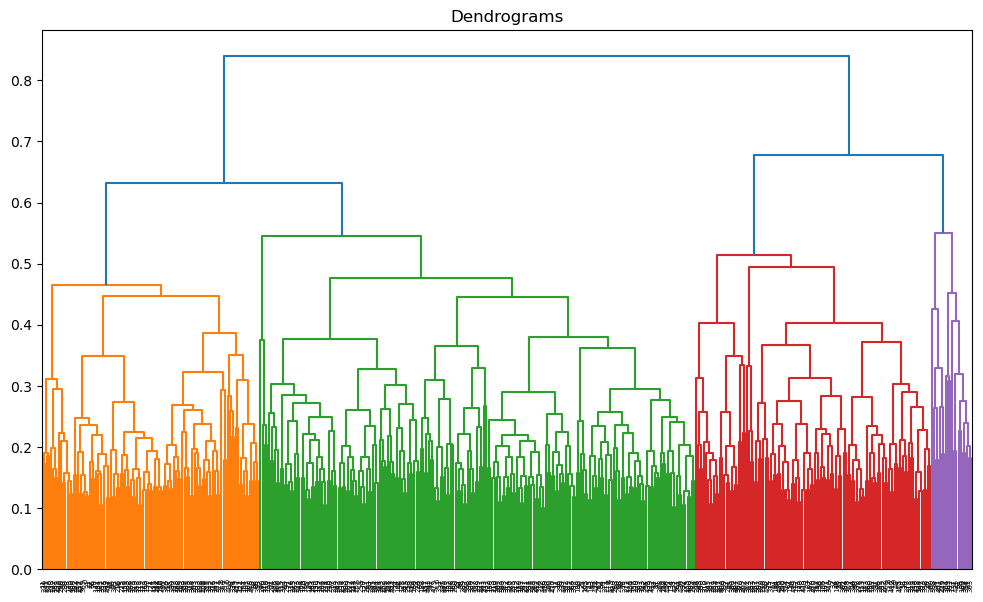

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(gct_scaled, method='complete'))
# x-axis contains the samples
# y-axis contains the distances between these samples
# we can make a threshold value of 6, this will cut it off to 4 clusters

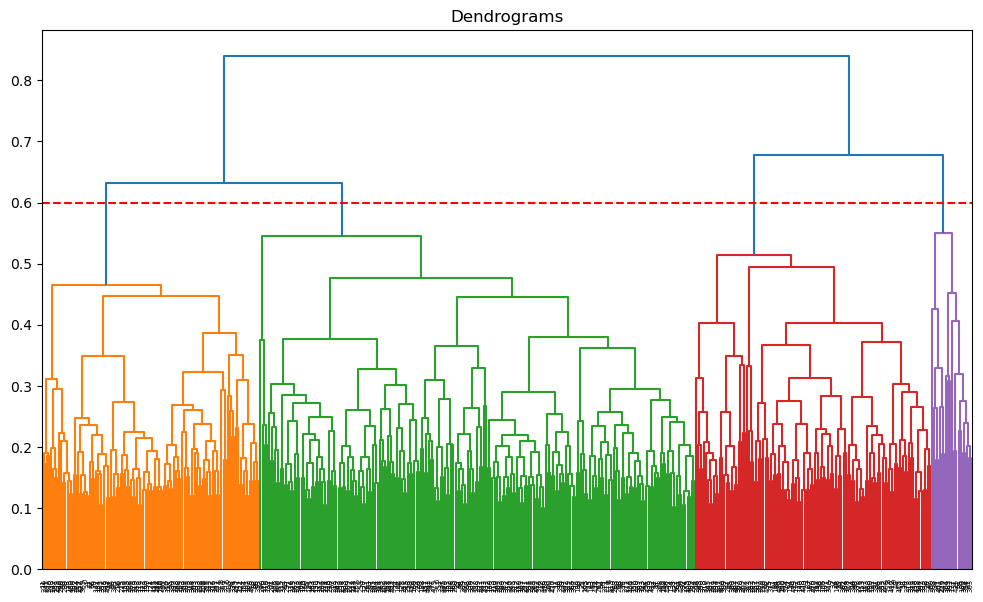

In [20]:
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(gct_scaled, method='complete'))
plt.axhline(y=0.6, color='r', linestyle='--') # at this threshold, we can use 4 clusters

In [46]:
# largest cluster difference can be decided at distance - 0.6, this resulted in 4 clusters
# we will now perform agglomerative clustering with cluster size = 4
from sklearn.cluster import AgglomerativeClustering
# number of clusters = 4
# metric = this is chosen by calculating the euclidean distance of the center of the cluster
# linkage methods: Ward minimizes the variance between clusters
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')  
clst_assignments = cluster.fit_predict(gct_scaled)
clst_assignments
# we now have an array of cluster assignments for each sample
# we can now plot the using this array

# my questions:
#     What do these clst_assignments tell us? Likelihood for disease?
#     Do we need 4 clst assignmets?
#     Should we remove data that is not informative?


array([3, 2, 1, 3, 1, 3, 1, 2, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 2, 2, 3,
       1, 1, 2, 1, 2, 2, 3, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 3, 3, 3, 3, 1, 2, 3,
       3, 2, 2, 1, 1, 3, 1, 2, 1, 2, 1, 3, 3, 3, 1, 0, 1, 2, 2, 1, 3, 2,
       3, 0, 1, 1, 1, 1, 1, 3, 2, 1, 3, 1, 0, 3, 3, 1, 3, 2, 2, 2, 1, 1,
       1, 3, 2, 2, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 3,
       1, 3, 1, 3, 1, 1, 1, 3, 2, 3, 3, 3, 2, 1, 2, 3, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 2, 1, 1, 1, 3,
       1, 0, 2, 1, 1, 2, 1, 1, 3, 3, 3, 3, 1, 0, 2, 2, 1, 2, 2, 2, 2, 3,
       1, 1, 1, 2, 1, 3, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3,
       3, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 2, 0, 1, 1, 1,
       3, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 3,
       3, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 1, 3, 1, 1,

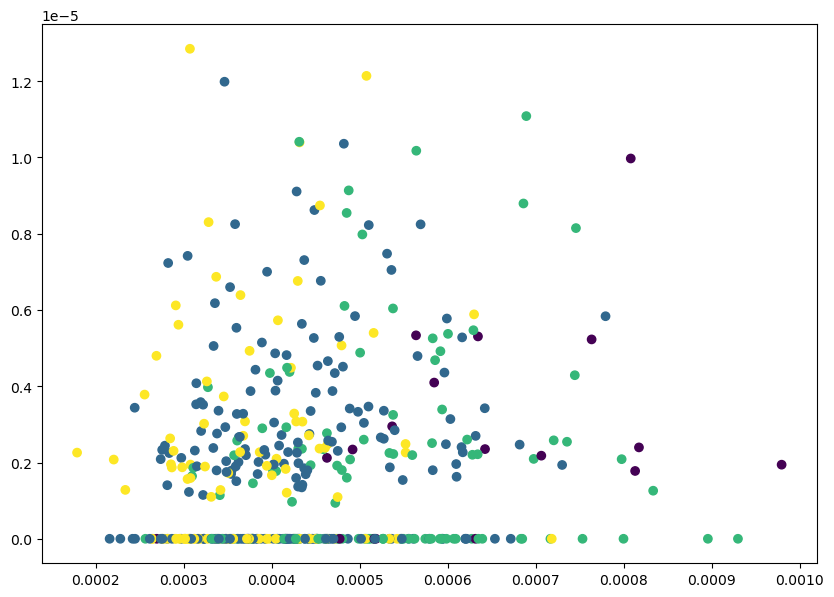

In [34]:
plt.figure(figsize=(10, 7))  
plt.scatter(gct_scaled[0], gct_scaled[1], c=cluster.labels_) 

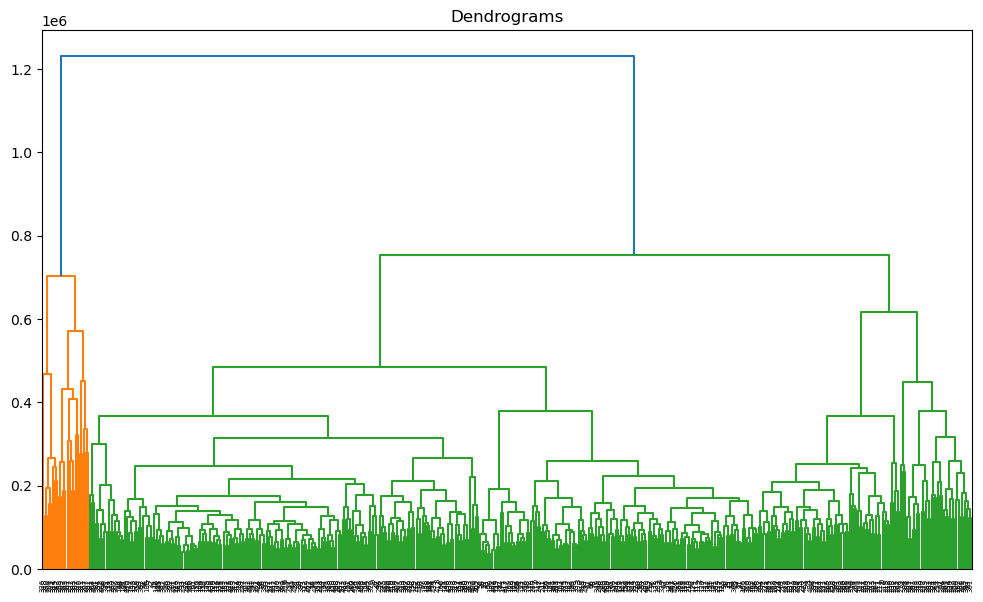

In [37]:
# unscaled
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(12, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(gct_data_T, method='complete'))

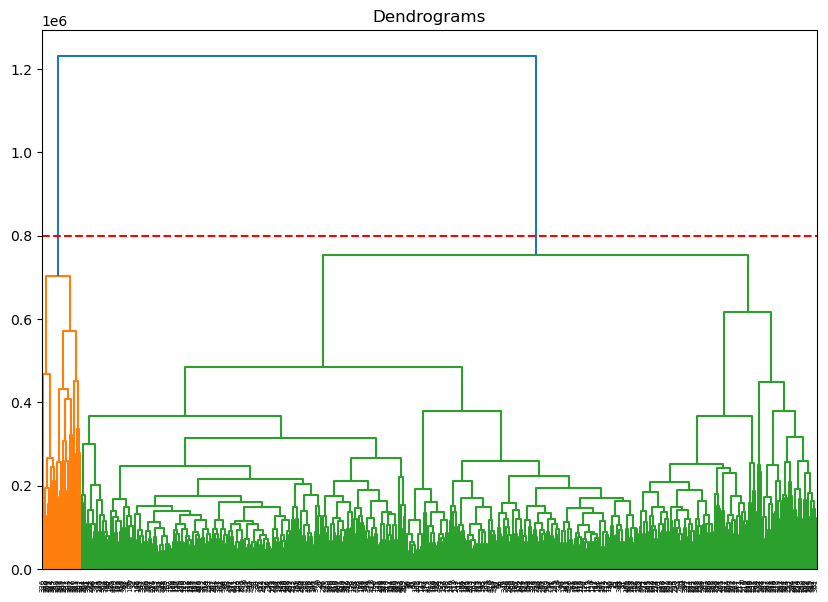

In [42]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(gct_data_T, method='complete'))
plt.axhline(y=0.8e6, color='r', linestyle='--') # at this threshold, we can use 2 clusters

In [47]:
# largest cluster difference can be decided at distance - 0.6, this resulted in 4 clusters
# we will now perform agglomerative clustering with cluster size = 4
from sklearn.cluster import AgglomerativeClustering
# number of clusters = 4
# metric = this is chosen by calculating the euclidean distance of the center of the cluster
# linkage methods: Ward minimizes the variance between clusters
cluster_two = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')  
clst_assignments_no_scale = cluster_two.fit_predict(gct_data_T)
clst_assignments_no_scale
# we now have an array of cluster assignments for each sample
# we can now plot the using this array
# """
# This is the data without normalizing it, we get two clusters which could be our diseased vs healthy
# """

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

(0.0, 8.0)

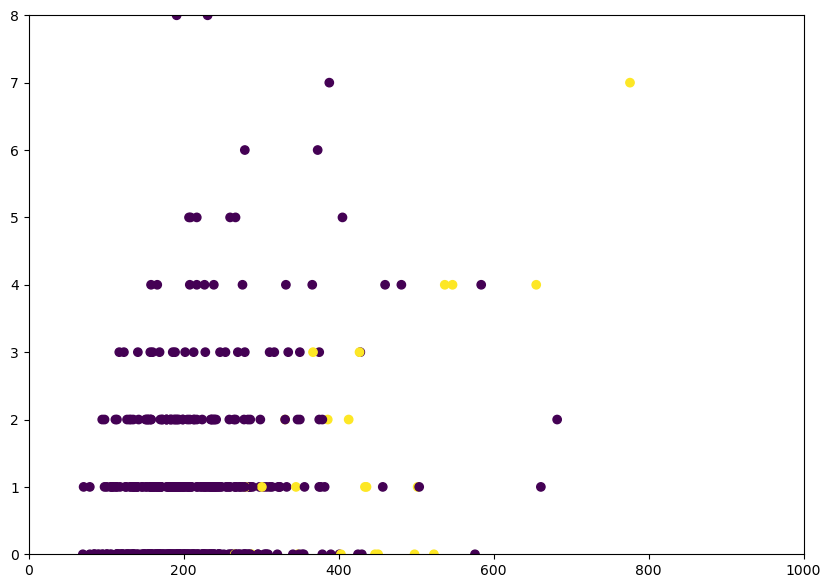

In [53]:
# this one needs some work
plt.figure(figsize=(10, 7))  
plt.scatter(gct_data_T[0], gct_data_T[1], c=cluster_two.labels_) 
plt.xlim(0,1000)
plt.ylim(0,8)